#### Visualization of the steps to remove the background

1) Imports

In [1]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from scipy import ndimage as ndi
from skimage.filters import sobel
import skimage


# import Modules.display as disp
# import Modules.filters as fil

%matplotlib widget

2) Segmentation Pipeline

Min =  0.0 	Max =  1595.2089 	Shape =  260


(-0.5, 310.5, 259.5, -0.5)

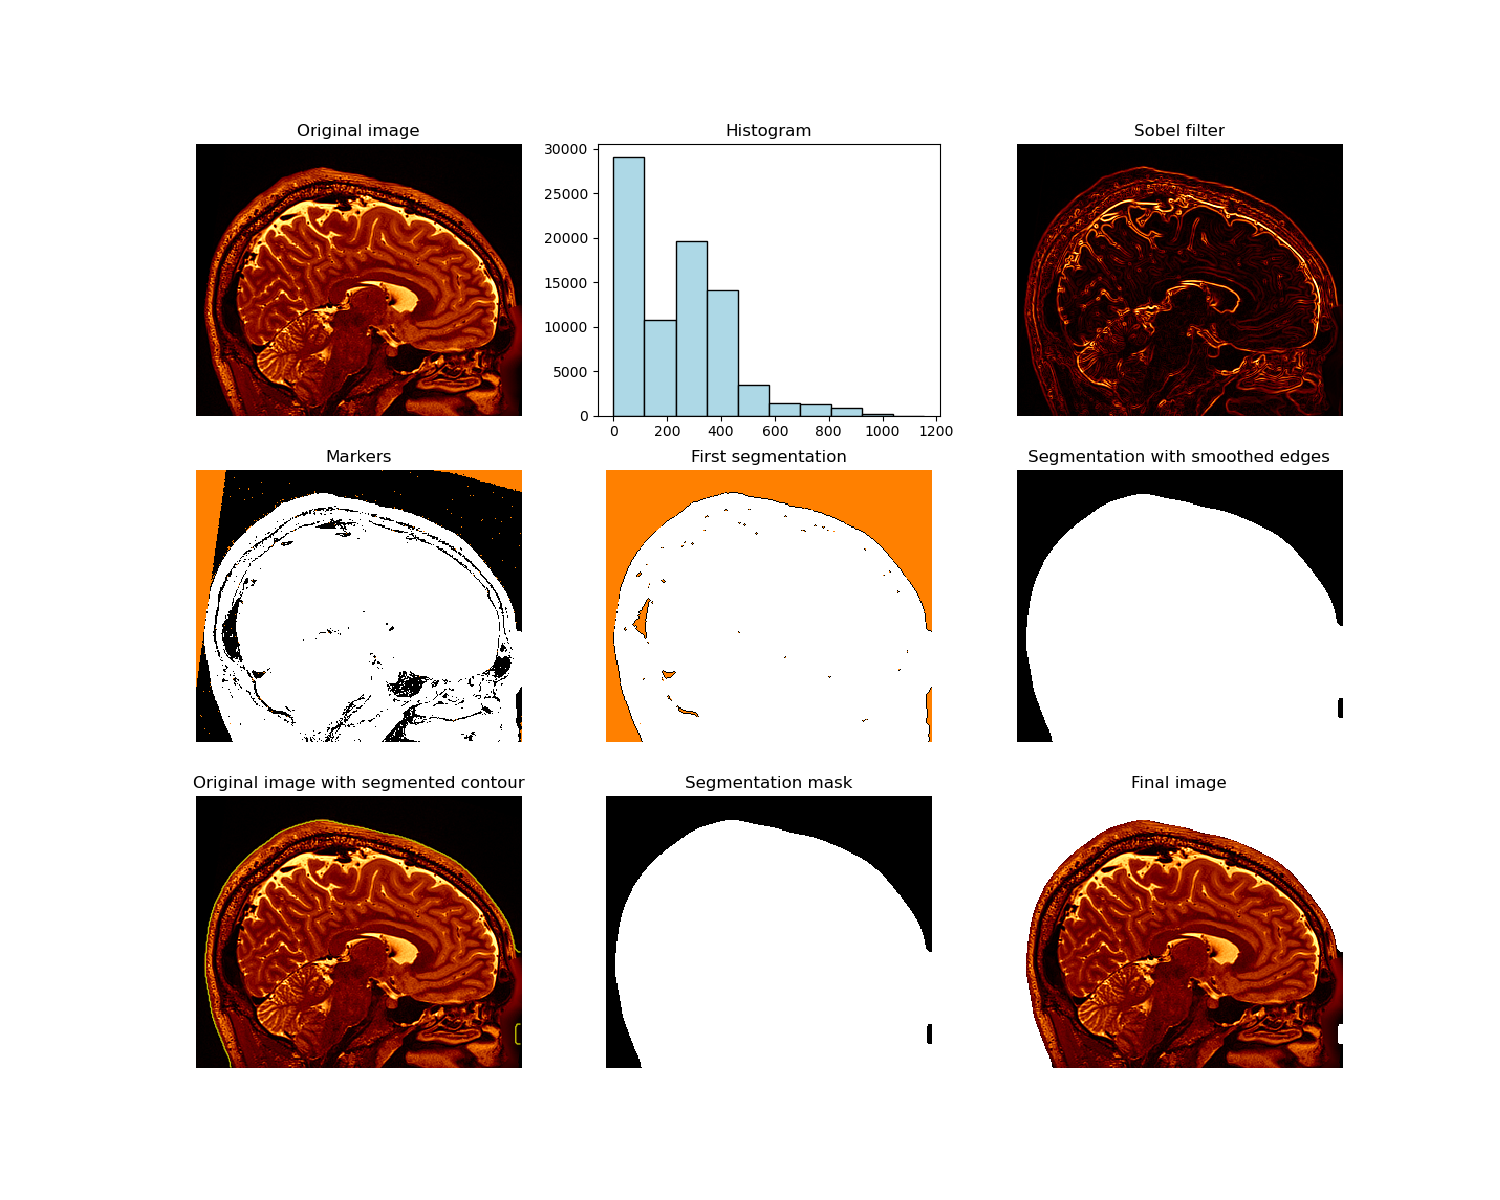

In [2]:
slice = 120
path = '/user/lcorcos/home/Desktop/MRI_Project/Data/Origin/100206/T1w/T2w_acpc_dc_restore.nii.gz'
colormap = 'afmhot'

plt.close()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15,12))

# loading an image
nii_data = nib.load(path)
nii_img = nii_data.get_fdata()
nii_img = nii_img.astype(np.float32) # Optional ?

nii_img = np.rot90(nii_img, 1, axes=(1, 2))

# nii_img = ndi.rotate(nii_img[0, :, :], 90)
img = nii_img[slice]
#img = ndi.rotate(img, 90)

max = np.max(nii_img)
min = np.min(nii_img)

print('Min = ', min, '\tMax = ', max, '\tShape = ', len(nii_img))

ax1.imshow(img, interpolation='nearest', cmap=colormap)
ax1.set_title('Original image')
ax1.axis('off')

ax2.hist(img.flatten(), color='lightblue', edgecolor='black', linewidth=1)
ax2.set_title('Histogram')

elevation_map = sobel(img)  # Sobel filter

ax3.imshow(elevation_map, interpolation='nearest', cmap=colormap)
ax3.set_title('Sobel filter')
ax3.axis('off')

markers = np.zeros_like(img)
if 'T2' in path:
    markers[img < 1] = 1
    markers[img > 60] = 2

else:
    markers[img < 1] = 1
    markers[img > 120] = 2
    
ax4.imshow(markers, interpolation='nearest', cmap=colormap)
ax4.set_title('Markers')
ax4.axis('off')
    
segmentation_base = skimage.segmentation.watershed(elevation_map, markers, watershed_line = True)

ax5.imshow(segmentation_base, interpolation='nearest', cmap=colormap)
ax5.set_title('First segmentation')
ax5.axis('off')

segmentation_best_outline = ndimage.median_filter(segmentation_base, 20)

ax6.imshow(segmentation_best_outline, interpolation='nearest', cmap=colormap)
ax6.set_title('Segmentation with smoothed edges')
ax6.axis('off')

segmentation_final = ndi.binary_fill_holes(segmentation_best_outline - 1)

ax7.imshow(img, interpolation='nearest', cmap=colormap)
ax7.contour(segmentation_final, [0.5], linewidths=1, colors='y')
ax7.set_title('Original image with segmented contour')
ax7.axis('off')

mask, _ = ndi.label(segmentation_final)

ax8.imshow(mask, interpolation='nearest', cmap=colormap)
ax8.set_title('Segmentation mask')
ax8.axis('off')

img[mask == 0] = 1200

ax9.imshow(img, interpolation='nearest', cmap=colormap)
ax9.set_title('Final image')
ax9.axis('off')
